In [1]:
                                            #---- Data warehousing ----#
#                                                 ----------------
#-----
import pandas as pd #reading and writing csv files  
import numpy as np # dealing with arrays 
import seaborn as sns # for advanced graphs 
import matplotlib.pyplot as plt # for traditional graphs 
from scipy import stats

                                            #---- Machine learning ----#
#                                                 ----------------

# draw matplotlib graphs inline 
%matplotlib inline
sns.set_style("whitegrid") # configuration for seaborn library

In [2]:
orders = pd.read_excel('ex_retail2_cleaned_data.xlsx')

In [3]:
orders.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037173 entries, 0 to 1037172
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1037173 non-null  int64  
 1   Unnamed: 0    1037173 non-null  int64  
 2   InvoiceNo     1037173 non-null  int64  
 3   StockCode     1037173 non-null  object 
 4   Description   1037173 non-null  object 
 5   Quantity      1037173 non-null  int64  
 6   InvoiceDate   1037173 non-null  object 
 7   UnitPrice     1037173 non-null  float64
 8   CustomerID    801565 non-null   float64
 9   Country       1037173 non-null  object 
 10  TotalPrice    1037173 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 87.0+ MB


In [ ]:
orders_t = orders

In [11]:
orders.InvoiceNo = pd.to_numeric(orders.InvoiceNo)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037173 entries, 0 to 1037172
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1037173 non-null  int64  
 1   Unnamed: 0    1037173 non-null  int64  
 2   InvoiceNo     1037173 non-null  int64  
 3   StockCode     1037173 non-null  object 
 4   Description   1037173 non-null  object 
 5   Quantity      1037173 non-null  int64  
 6   InvoiceDate   1037173 non-null  object 
 7   UnitPrice     1037173 non-null  float64
 8   CustomerID    801565 non-null   float64
 9   Country       1037173 non-null  object 
 10  TotalPrice    1037173 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 87.0+ MB


In [4]:
# Convert InvoiceDate to datetime object
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

# Truncate the minutes part of datetime object
orders['InvoiceDate'] = orders.InvoiceDate.dt.date

In [16]:
# Confirm all cancelled orders have negative TotalPrice and Quantity
# orders['InvoiceNo'] = orders['InvoiceNo'].astype(str)

print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.TotalPrice<0)])
print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.Quantity<0)])

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []
Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []


In [27]:
orders.drop(['Unnamed: 0.1', 'Unnamed: 0', 'InvoiceNo', 'CustomerID','Country','Description','UnitPrice'],
            axis=1,inplace=True)

KeyError: "['InvoiceNo', 'CustomerID', 'Country', 'Description', 'UnitPrice'] not found in axis"

In [28]:
orders.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1,inplace=True)

In [45]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
0,2009-12-01,10002,12,10.20,2009,4,12,49,1,1,335,0.850000
1,2009-12-01,10120,60,12.60,2009,4,12,49,1,1,335,0.210000
2,2009-12-01,10125,5,5.10,2009,4,12,49,1,1,335,1.020000
3,2009-12-01,10133,23,26.35,2009,4,12,49,1,1,335,1.145652
4,2009-12-01,11001,2,6.86,2009,4,12,49,1,1,335,3.430000


In [31]:
orders = orders.groupby(['InvoiceDate', 'StockCode'], as_index=False).sum()

In [34]:
orders.head(100)

,InvoiceDate,StockCode,Quantity,TotalPrice
0,2009-12-01,10002,12,10.20
1,2009-12-01,10120,60,12.60
2,2009-12-01,10125,5,5.10
3,2009-12-01,10133,23,26.35
4,2009-12-01,11001,2,6.86
...,...,...,...,...
95,2009-12-01,20830,3,6.30
96,2009-12-01,20831,3,6.30
97,2009-12-01,20832,1,1.70
98,2009-12-01,20863,1,4.30


In [35]:
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

In [36]:
orders['Year'] = orders.InvoiceDate.dt.year
orders['Quarter'] = orders.InvoiceDate.dt.quarter
orders['Month'] = orders.InvoiceDate.dt.month
orders['Week'] = orders.InvoiceDate.dt.week
orders['Weekday'] = orders.InvoiceDate.dt.weekday
orders['Day'] = orders.InvoiceDate.dt.day
orders['Dayofyear'] = orders.InvoiceDate.dt.dayofyear
orders['UnitPrice'] = orders.TotalPrice/orders.Quantity

C:\Users\pc\AppData\Local\Temp\ipykernel_24528\180242656.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders['Week'] = orders.InvoiceDate.dt.week


In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530447 entries, 0 to 530446
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  530447 non-null  datetime64[ns]
 1   StockCode    530447 non-null  object        
 2   Quantity     530447 non-null  int64         
 3   TotalPrice   530447 non-null  float64       
 4   Year         530447 non-null  int64         
 5   Quarter      530447 non-null  int64         
 6   Month        530447 non-null  int64         
 7   Week         530447 non-null  int64         
 8   Weekday      530447 non-null  int64         
 9   Day          530447 non-null  int64         
 10  Dayofyear    530447 non-null  int64         
 11  UnitPrice    530447 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 48.6+ MB


In [47]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.00000,530447.000000,530447.000000
mean,19.586815,34.436133,2010.439303,2.679548,7.067911,28.619148,2.517865,15.32725,199.125375,3.495316
std,64.059863,71.381389,0.573044,1.145581,3.504972,15.205946,1.897490,8.62127,106.153333,8.090734
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.00000,4.000000,0.001000
25%,2.000000,5.800000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.00000,106.000000,1.250000
50%,6.000000,15.000000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.00000,208.000000,2.100000
75%,18.000000,32.750000,2011.000000,4.000000,10.000000,43.000000,4.000000,23.00000,297.000000,4.130000
max,7128.000000,3996.760000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.00000,357.000000,604.120000


In [48]:
# Drop rows with negative Quantity

orders = orders.drop(orders[orders.Quantity<=0].index).reset_index(drop=True)
orders = orders.drop(orders[orders.TotalPrice<=0].index).reset_index(drop=True)

# Removing outliers in Quantity and TotalPrice
orders = orders[(np.abs(stats.zscore(orders.Quantity)) < 3)]
orders = orders[(np.abs(stats.zscore(orders.TotalPrice)) < 3)]

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515720 entries, 0 to 530446
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  515720 non-null  datetime64[ns]
 1   StockCode    515720 non-null  object        
 2   Quantity     515720 non-null  int64         
 3   TotalPrice   515720 non-null  float64       
 4   Year         515720 non-null  int64         
 5   Quarter      515720 non-null  int64         
 6   Month        515720 non-null  int64         
 7   Week         515720 non-null  int64         
 8   Weekday      515720 non-null  int64         
 9   Day          515720 non-null  int64         
 10  Dayofyear    515720 non-null  int64         
 11  UnitPrice    515720 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 51.2+ MB


In [50]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000
mean,14.311580,25.566179,2010.440148,2.674352,7.050419,28.543382,2.527317,15.338787,198.604000,3.327203
std,22.386213,32.923020,0.573039,1.145600,3.503978,15.203342,1.903652,8.622299,106.138109,4.698653
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.001000
25%,2.000000,5.100000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.000000,105.000000,1.250000
50%,6.000000,14.850000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.000000,207.000000,2.100000
75%,16.000000,30.000000,2011.000000,4.000000,10.000000,42.000000,4.000000,23.000000,297.000000,4.130000
max,211.000000,211.320000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.000000,357.000000,208.920000


C:\Users\pc\AppData\Local\Temp\ipykernel_24528\2934381453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = orders.corr()


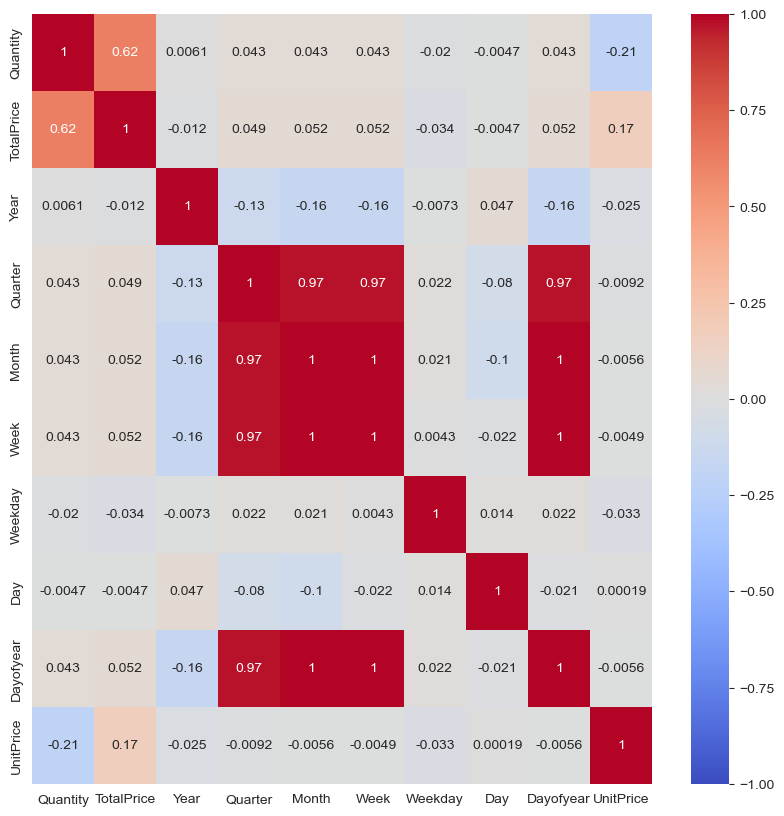

In [51]:
corrmat = orders.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))

g = sns.heatmap(orders[top_corr_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)

In [52]:
orders.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True)

In [53]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [ ]:
orders.to_excel('ex_retail2_forecasting_data.xlsx')